In [3]:
%pip install node2vec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 3.7 MB/s eta 0:00:00m eta 0:00:010:01:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from node2vec import Node2Vec

In [7]:
G = nx.karate_club_graph()

node2vec = Node2Vec(G, dimensions=2, walk_length=30, num_walks=200, workers=4)

model = node2vec.fit(window=10, min_count=1, batch_words=4)

node_embeddings = {node: model.wv[node] for node in G.nodes()}


Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

Generating walks (CPU: 3): 100%|██████████| 50/50 [00:00<00:00, 738.16it/s]


In [11]:
print(node_embeddings[11], len(node_embeddings))

[-0.44162428  1.0620334 ] 34


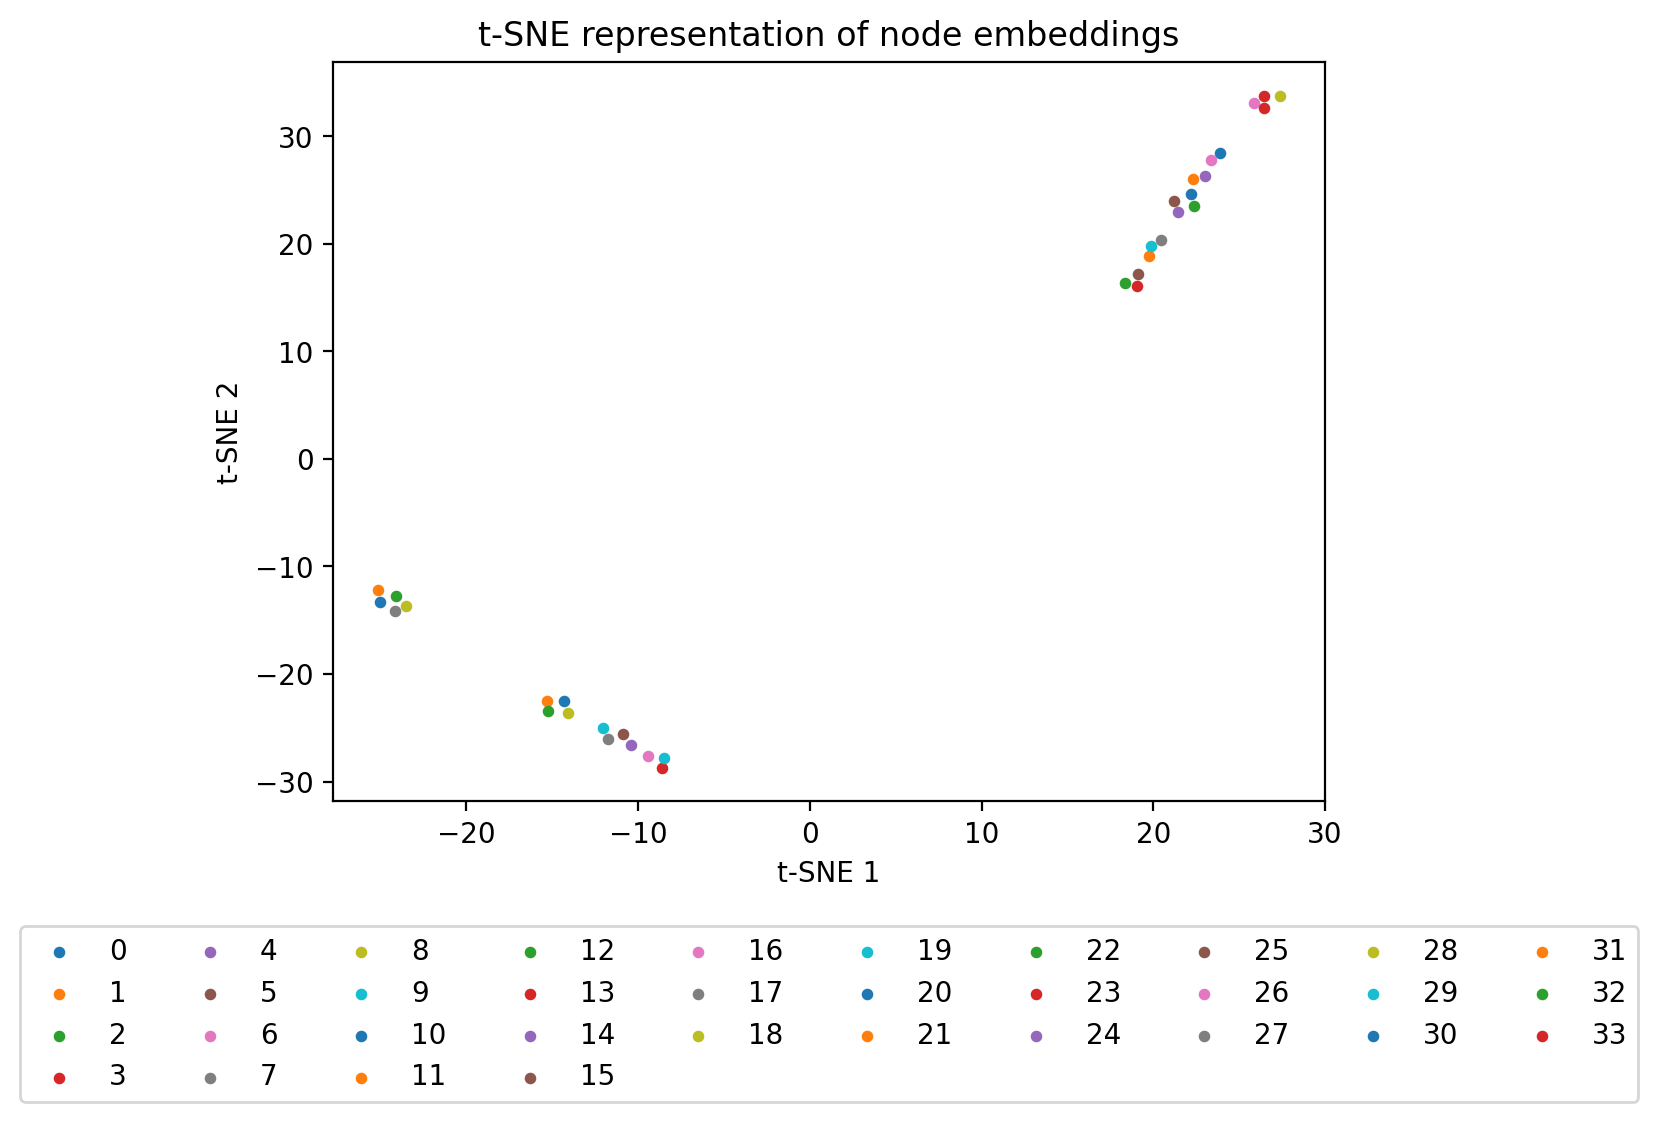

In [28]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

embeddings = list(node_embeddings.values())
node_labels = list(node_embeddings.keys())

tsne = TSNE(n_components=2, random_state=1252, perplexity=5)
embeddings_array = np.array(embeddings)
embeddings_2d = tsne.fit_transform(embeddings_array)

# Group similar labels together
unique_labels = set(node_labels)
for label in unique_labels:
    indices = [i for i, lbl in enumerate(node_labels) if lbl == label]
    plt.scatter(embeddings_2d[indices, 0], embeddings_2d[indices, 1], label=str(label), s=10)

plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE representation of node embeddings')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=10)
plt.savefig('karate.png')


